# Project: Investigate a Movie Dataset
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#profit">Analysis on Profitability</a></li>
    <li><a href="#wrangling1">Profitability- Data Wrangling</a></li>
    <li><a href="#eda1">Profitability- Exploratory Data Analysis</a></li>
<li><a href="#genre">Analysis on Genres</a></li>
    <li><a href="#wrangling2">Genres - Data Wrangling</a></li>
    <li><a href="#eda2">Genres - Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this report, I am going to analyze the Imdb Movie dataset. This dataset includes various variables which I grouped into following buckets:
1. Individual variables: Title, Genre and Production Company  
2. Income variables- Budget and Revenue 
3. Popularity variables- Populartiy, Vote_count and Vote_average
4. Year variables - Release Year and Release Date 
5. Other variables- Cast and Director columns

I come from Finance background and hence out of natural curiosity, the following question came up in my mind when I quickly glanced through the dataset.
* What is the profit trend of the film industry as a whole?
* Name Top 10 profitable companies and top 10 loss making companies.
* Number of production companies falling into different profit range.

It will also be fun to play with genres and its popularity and try to answer below questions.
* Which genre is most popular?
* Number of movies produced by each genre over the period of time.

So, lets start our analysis. But before diving into analysis, lets import the file and necessary pyhton packages.

In [1]:
# Import necessary packages required for analysis and load the csv file as 'df'file

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

df = pd.read_csv('C:/Users/sjain42/Documents/practise/Udacity/Project_2_investigating_data_sets/tmdb_movies/imdb-movies.csv', engine = 'python',sep = ',')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [2]:
#Check the contents of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The above code gives us the following information:

* There are 10866 rows and 21 columns.
* There are 9 columns having null values.
* The column lables are in small case and snake case format and hence not required to rename the labels.
* The data type of all the columns appears to be correct and hence no changes required for data types. Although the release date could be in datetime type but I have decided not to use this column and hence not making any changes in the data type for release date.

In [3]:
# Check basic descriptive statistics 
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


A quick glance over basic desriptive statistics gives the following information:

* This dataset includes movies released from 1960 to 2015. 
* The highest revenues for a given movie is 2.78 Billion Dollars whereas lowest revenue is zero. The zero indicates some values to be zero.Similary highest budget for a given movie is 425 Million Dollars whereas lowest revenue is zero. The zero indicates some values to be zero.
* The average runtime of movies is 102 minutes.
* The average popularity of movies is 0.646.

<a id='profit'></a>
## Research questions on profitability

This section analyze the proft attributes to address the below questions:

1. What is the profit trend of the film industry as a whole?
2. Name Top 10 profitable companies and top 10 loss making companies.
3. Number of production companies falling into different profit range.

The following variables will be used for the analysis

* id
* Release_year
* Original_title
* Production_companies
* Budget
* Revenue

The dataset contains many zeros, null and duplicate values. Hence, the dataset should be cleaned and wrangled before starting the analysis. 


<a id='wrangling1'></a>
### Data Wrangling

> In this section I will clean the data for futher analysis. The data cleaning steps inlclude checking the contents of the variables, data types, null values, duplicate rows and column labels.

In [28]:
# Create a new dataframe with selected columns
df1 = df[[ 'id', 'release_year', 'original_title', 'production_companies', 'budget','revenue']]
df1.is_copy = False
df1

,id,release_year,original_title,production_companies,budget,revenue
0,135397,2015,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,150000000,1513528810
1,76341,2015,Mad Max: Fury Road,Village Roadshow Pictures|Kennedy Miller Produ...,150000000,378436354
2,262500,2015,Insurgent,Summit Entertainment|Mandeville Films|Red Wago...,110000000,295238201
3,140607,2015,Star Wars: The Force Awakens,Lucasfilm|Truenorth Productions|Bad Robot,200000000,2068178225
4,168259,2015,Furious 7,Universal Pictures|Original Film|Media Rights ...,190000000,1506249360
...,...,...,...,...,...,...
10861,21,1966,The Endless Summer,Bruce Brown Films,0,0
10862,20379,1966,Grand Prix,Cherokee Productions|Joel Productions|Douglas ...,0,0
10863,39768,1966,Beregis Avtomobilya,Mosfilm,0,0
10864,21449,1966,"What's Up, Tiger Lily?",Benedict Pictures Corp.,0,0


In [5]:
# Check null values
df1.isnull().sum()

id                         0
release_year               0
original_title             0
production_companies    1030
budget                     0
revenue                    0
dtype: int64

Production_companies ave null values. I will drop those null values.

In [6]:
# drop null values and confirm non- null values

df1.dropna(inplace= True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9836 entries, 0 to 10865
Data columns (total 6 columns):
id                      9836 non-null int64
release_year            9836 non-null int64
original_title          9836 non-null object
production_companies    9836 non-null object
budget                  9836 non-null int64
revenue                 9836 non-null int64
dtypes: int64(4), object(2)
memory usage: 461.1+ KB


> Now I will check if there are any duplicate rows and will drop those duplicate rows.

In [7]:
# check duplicate values
sum(df1.duplicated())

1

In [8]:
# Drop duplicate values
df1.drop_duplicates(inplace  = True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9835 entries, 0 to 10865
Data columns (total 6 columns):
id                      9835 non-null int64
release_year            9835 non-null int64
original_title          9835 non-null object
production_companies    9835 non-null object
budget                  9835 non-null int64
revenue                 9835 non-null int64
dtypes: int64(4), object(2)
memory usage: 461.0+ KB


> I noticed that there are several zero values in budget and revenue column. I will drop these rows too.

In [9]:
# Drop zero values by replacing zero values into nan values
df1= df1.replace(0,np.nan)
df1=df1.dropna(axis = 0, how = 'any')
df1

,id,release_year,original_title,production_companies,budget,revenue
0,135397,2015,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,150000000.0,1.513529e+09
1,76341,2015,Mad Max: Fury Road,Village Roadshow Pictures|Kennedy Miller Produ...,150000000.0,3.784364e+08
2,262500,2015,Insurgent,Summit Entertainment|Mandeville Films|Red Wago...,110000000.0,2.952382e+08
3,140607,2015,Star Wars: The Force Awakens,Lucasfilm|Truenorth Productions|Bad Robot,200000000.0,2.068178e+09
4,168259,2015,Furious 7,Universal Pictures|Original Film|Media Rights ...,190000000.0,1.506249e+09
...,...,...,...,...,...,...
10822,396,1966,Who's Afraid of Virginia Woolf?,Chenault Productions,7500000.0,3.373669e+07
10828,5780,1966,Torn Curtain,Universal Pictures,3000000.0,1.300000e+07
10829,6644,1966,El Dorado,Paramount Pictures|Laurel Productions,4653000.0,6.000000e+06
10835,5923,1966,The Sand Pebbles,Twentieth Century Fox Film Corporation|Solar P...,12000000.0,2.000000e+07


> Now, the dataset is cleaned for futher analysis.

<a id='eda1'></a>
## Exploratory Data Analysis


### 1. What is the profit trend of the film industry as a whole?

> To answer this question,I will first calculate profits for each movie and then calculate average profits for each year. For better presentation purpose, profits are shown in millions.

In [10]:
# calculate profits by reducing budget from revenue
profit = (df1['revenue']-df1['budget'])/1000000
df1['total_profits'] = profit # Create new column for profits
df1

,id,release_year,original_title,production_companies,budget,revenue,total_profits
0,135397,2015,Jurassic World,Universal Studios|Amblin Entertainment|Legenda...,150000000.0,1.513529e+09,1363.528810
1,76341,2015,Mad Max: Fury Road,Village Roadshow Pictures|Kennedy Miller Produ...,150000000.0,3.784364e+08,228.436354
2,262500,2015,Insurgent,Summit Entertainment|Mandeville Films|Red Wago...,110000000.0,2.952382e+08,185.238201
3,140607,2015,Star Wars: The Force Awakens,Lucasfilm|Truenorth Productions|Bad Robot,200000000.0,2.068178e+09,1868.178225
4,168259,2015,Furious 7,Universal Pictures|Original Film|Media Rights ...,190000000.0,1.506249e+09,1316.249360
...,...,...,...,...,...,...,...
10822,396,1966,Who's Afraid of Virginia Woolf?,Chenault Productions,7500000.0,3.373669e+07,26.236689
10828,5780,1966,Torn Curtain,Universal Pictures,3000000.0,1.300000e+07,10.000000
10829,6644,1966,El Dorado,Paramount Pictures|Laurel Productions,4653000.0,6.000000e+06,1.347000
10835,5923,1966,The Sand Pebbles,Twentieth Century Fox Film Corporation|Solar P...,12000000.0,2.000000e+07,8.000000


In [11]:
# Calculate the annual average profits for each year 
Annual_average_profits = df1.groupby('release_year')['production_companies','total_profits'].mean().rename(columns={'total_profits': 'avg_profits'}).reset_index()
Annual_average_profits 


,release_year,avg_profits
0,1960,21.639610
1,1961,29.908319
2,1962,23.839978
3,1963,19.235314
4,1964,42.096912
5,1965,79.856371
6,1966,10.493738
7,1967,48.948818
8,1968,18.696862
9,1969,51.715747


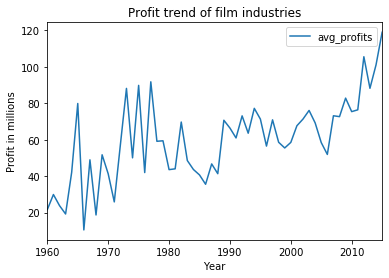

In [12]:
# Show profit trend over the years
Annual_average_profits.plot(x = 'release_year', y= 'avg_profits', kind = 'line')
plt.title('Profit trend of film industries')
plt.xlabel('Year')
plt.ylabel('Profit in millions')
plt.show();

> The overall profit trend is positive with 2015 being highest with 119 millions average profit and 1966 being lowest with 10 millions.


### 2. Top 10 profitable companies and top 10 loss companies

> To answer this question, I will split the production companies and stack it onto next rows. Then, calculate acutal profits for each production company by dividing total profits of a movie with total number of production companies for each movie.Then I will calculate average profits by grouping the production companies.

In [13]:
# Split production companies into separate rows
df1= df1.drop('production_companies', axis=1).join(df['production_companies'].str.split('|', expand=True).stack()
                                                   .reset_index(level=1, drop=True).rename('production_companies'))
df1

,id,release_year,original_title,budget,revenue,total_profits,production_companies
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Universal Studios
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Amblin Entertainment
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Legendary Pictures
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Fuji Television Network
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Dentsu
...,...,...,...,...,...,...,...
10829,6644,1966,El Dorado,4653000.0,6.000000e+06,1.34700,Laurel Productions
10835,5923,1966,The Sand Pebbles,12000000.0,2.000000e+07,8.00000,Twentieth Century Fox Film Corporation
10835,5923,1966,The Sand Pebbles,12000000.0,2.000000e+07,8.00000,Solar Productions
10835,5923,1966,The Sand Pebbles,12000000.0,2.000000e+07,8.00000,Robert Wise Productions


In [14]:
#Count the number of production companies for each movie 
id_count = df1.groupby('id')['id'].transform('count')
#Calculate actual profits total profits of a movie with total number of production companies for each movie
actual_profits  = df1['total_profits'] / id_count
# create new column for actual profits 
df1['profits'] = actual_profits 
df1

,id,release_year,original_title,budget,revenue,total_profits,production_companies,profits
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Universal Studios,272.705762
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Amblin Entertainment,272.705762
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Legendary Pictures,272.705762
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Fuji Television Network,272.705762
0,135397,2015,Jurassic World,150000000.0,1.513529e+09,1363.52881,Dentsu,272.705762
...,...,...,...,...,...,...,...,...
10829,6644,1966,El Dorado,4653000.0,6.000000e+06,1.34700,Laurel Productions,0.673500
10835,5923,1966,The Sand Pebbles,12000000.0,2.000000e+07,8.00000,Twentieth Century Fox Film Corporation,2.666667
10835,5923,1966,The Sand Pebbles,12000000.0,2.000000e+07,8.00000,Solar Productions,2.666667
10835,5923,1966,The Sand Pebbles,12000000.0,2.000000e+07,8.00000,Robert Wise Productions,2.666667


In [15]:
#Top 10 profitable company
average_profits = df1.groupby('production_companies')[['production_companies','profits']].mean().reset_index()
top_profit_companies = average_profits.sort_values(['profits'], ascending=[False])
top_profit_companies.head(10)

,production_companies,profits
2995,Truenorth Productions,622.726075
1833,Marvel Studios,444.511209
1739,Lucasfilm,304.373054
1378,Illumination Entertainment,285.180087
825,Disney Enterprises,256.875326
2561,Second Mate Productions,254.443302
2201,Patalex IV Productions Limited,248.640345
1341,Hoya Productions,216.653073
2250,Pixar Animation Studios,214.449969
266,B24,211.891536


In [16]:
#Top 10 loss making companies
average_losses = df1.groupby('production_companies')[['production_companies','profits']].mean().rename(columns={'profits': 'avg_losses'}).reset_index()
top_loss_companies = average_losses.sort_values(['avg_losses'])
top_loss_companies.head(10)

,production_companies,avg_losses
405,Boram Entertainment Inc.,-413.912431
376,Blind Wink Productions,-33.142018
2625,Silver Bullet Productions (II),-33.142018
1718,Lolita Productions,-30.469972
2775,Summertime Entertainment,-25.668986
2121,Open City Films,-23.875392
2202,Patalex Productions,-23.302031
558,Cherry Alley Productions,-23.000000
401,Boll KG,-22.594580
2169,Pan EuropÃƒÂ©enne Production,-21.726395


> Interestingly,  Blind Wink Productions and Silver Bullet Productions have exactly same average losses. When I digged into the dataset, I found both of these companies produced only one movie. This is confirmed in the following code.

In [17]:
# Find values containing Blind Wink Productions in the production companies column
find_Blind = df1[df1['production_companies'].str.contains('Blind Wink Productions')]
find_Blind


,id,release_year,original_title,budget,revenue,total_profits,production_companies,profits
5508,57201,2013,The Lone Ranger,255000000.0,89289910.0,-165.71009,Blind Wink Productions,-33.142018


In [18]:
# Find values containing Silver Bullet Productions in the production companies column
find_Silver = df1[df1['production_companies'].str.contains('Silver Bullet Productions')]
find_Silver

,id,release_year,original_title,budget,revenue,total_profits,production_companies,profits
5508,57201,2013,The Lone Ranger,255000000.0,89289910.0,-165.71009,Silver Bullet Productions (II),-33.142018


### 3. Number of production companies falling into different profit range

> To answer this question, I will first look at the basic descriptive statistics of profit to set the placeholders for profit range. I will then create a new column for profit range by creating bins for different levels of profit range. Thereafter, I will count the production companies and group it under different profit range. 

In [19]:
# check descriptive statistics to set the profit range
top_profit_companies.describe()


,profits
count,3265.000000
mean,13.765138
std,31.868572
min,-413.912431
25%,-0.425000
50%,4.343560
75%,16.488734
max,622.726075


In [20]:
# Create bins for profit range and then create new column for profit range  
bin_edges = [-415,0,4,17,623]
bin_name= ['losses','marginal profits','good profits','excellant profits']
popular = pd.cut(top_profit_companies['profits'],bin_edges,labels = bin_name)
top_profit_companies['profit_range']=popular
top_profit_companies.sort_values('profits')

,production_companies,profits,profit_range
405,Boram Entertainment Inc.,-413.912431,losses
376,Blind Wink Productions,-33.142018,losses
2625,Silver Bullet Productions (II),-33.142018,losses
1718,Lolita Productions,-30.469972,losses
2775,Summertime Entertainment,-25.668986,losses
...,...,...,...
825,Disney Enterprises,256.875326,excellant profits
1378,Illumination Entertainment,285.180087,excellant profits
1739,Lucasfilm,304.373054,excellant profits
1833,Marvel Studios,444.511209,excellant profits


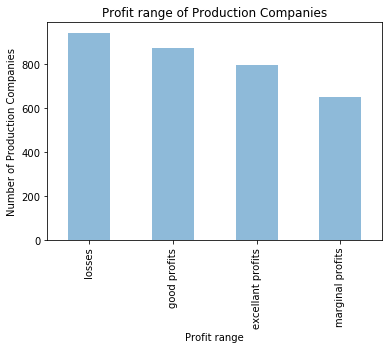

In [21]:
# count number of production companies performing well and see the results 
top_profit_companies.profit_range.value_counts().plot(kind= 'bar', alpha = 0.5);
plt.title('Profit range of Production Companies')
plt.xlabel('Profit range')
plt.ylabel('Number of Production Companies')
plt.show()

Interestingly, there are many companies that are at loss when compared to different levels of profit making companies.

<a id='genre'></a>
## Analysis on genres

This section analyze the proft attributes to address the below questions:

4. Which genre is most popular?
5. Number of movies produced by each genre over the period of time.

The following variables will be used for the analysis

* id
* Original_title
* Release_year
* Genre
* vote_count
* vote_average

<a id='wrangling1'></a>
### Data Wrangling

> In this section I will create new dataframe to include necesary columns and clean the data for futher analysis. Similar to above, the data cleaning steps inlclude checking the contents of the variables, data types, null values, duplicate rows and column labels.

In [22]:
# Create new data frame selecting necessary columns
df2 = df[['id','original_title','release_year','genres','popularity','vote_count','vote_average']]
df2.is_copy = False
df2

,id,original_title,release_year,genres,popularity,vote_count,vote_average
0,135397,Jurassic World,2015,Action|Adventure|Science Fiction|Thriller,32.985763,5562,6.5
1,76341,Mad Max: Fury Road,2015,Action|Adventure|Science Fiction|Thriller,28.419936,6185,7.1
2,262500,Insurgent,2015,Adventure|Science Fiction|Thriller,13.112507,2480,6.3
3,140607,Star Wars: The Force Awakens,2015,Action|Adventure|Science Fiction|Fantasy,11.173104,5292,7.5
4,168259,Furious 7,2015,Action|Crime|Thriller,9.335014,2947,7.3
...,...,...,...,...,...,...,...
10861,21,The Endless Summer,1966,Documentary,0.080598,11,7.4
10862,20379,Grand Prix,1966,Action|Adventure|Drama,0.065543,20,5.7
10863,39768,Beregis Avtomobilya,1966,Mystery|Comedy,0.065141,11,6.5
10864,21449,"What's Up, Tiger Lily?",1966,Action|Comedy,0.064317,22,5.4


In [23]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
id                10866 non-null int64
original_title    10866 non-null object
release_year      10866 non-null int64
genres            10843 non-null object
popularity        10866 non-null float64
vote_count        10866 non-null int64
vote_average      10866 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 509.4+ KB


In [24]:
df2.dropna(inplace= True)
df2.drop_duplicates(inplace  = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 7 columns):
id                10842 non-null int64
original_title    10842 non-null object
release_year      10842 non-null int64
genres            10842 non-null object
popularity        10842 non-null float64
vote_count        10842 non-null int64
vote_average      10842 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 592.9+ KB


> Now the dataset is cleaned for futher analysis.

<a id='eda2'></a>
## Exploratory Data Analysis

### 4. Which genre is most popular?

> I will first split the genres and stack onto next rows. Thereafter, I will calculate average popularity by grouping genres.

In [25]:
# Split genres and stack onto separate rows
df2= df2.drop('genres', axis=1).join(df['genres'].str.split('|', expand=True).stack()
                                                   .reset_index(level=1, drop=True).rename('genres'))
df2

,id,original_title,release_year,popularity,vote_count,vote_average,genres
0,135397,Jurassic World,2015,32.985763,5562,6.5,Action
0,135397,Jurassic World,2015,32.985763,5562,6.5,Adventure
0,135397,Jurassic World,2015,32.985763,5562,6.5,Science Fiction
0,135397,Jurassic World,2015,32.985763,5562,6.5,Thriller
1,76341,Mad Max: Fury Road,2015,28.419936,6185,7.1,Action
...,...,...,...,...,...,...,...
10863,39768,Beregis Avtomobilya,1966,0.065141,11,6.5,Mystery
10863,39768,Beregis Avtomobilya,1966,0.065141,11,6.5,Comedy
10864,21449,"What's Up, Tiger Lily?",1966,0.064317,22,5.4,Action
10864,21449,"What's Up, Tiger Lily?",1966,0.064317,22,5.4,Comedy


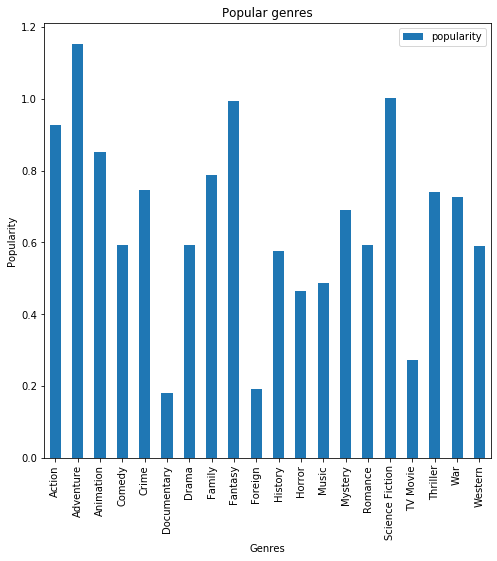

In [26]:
# Calculate average popularity of each genre and show the results by barplot
genre_popularity = df2.groupby('genres')[['genres','popularity']].mean().reset_index()
genre_popularity.plot(x = 'genres', y= 'popularity',kind = 'bar', figsize= (8,8));
plt.title('Popular genres')
plt.xlabel('Genres')
plt.ylabel('Popularity')
plt.show()


> Looks like adventure movies are more popular with the audience among other genres followed by science fiction.

## 5. Number of movies produced by each genre over the period of time

> For this, I will count the genres by grouping it with the year.

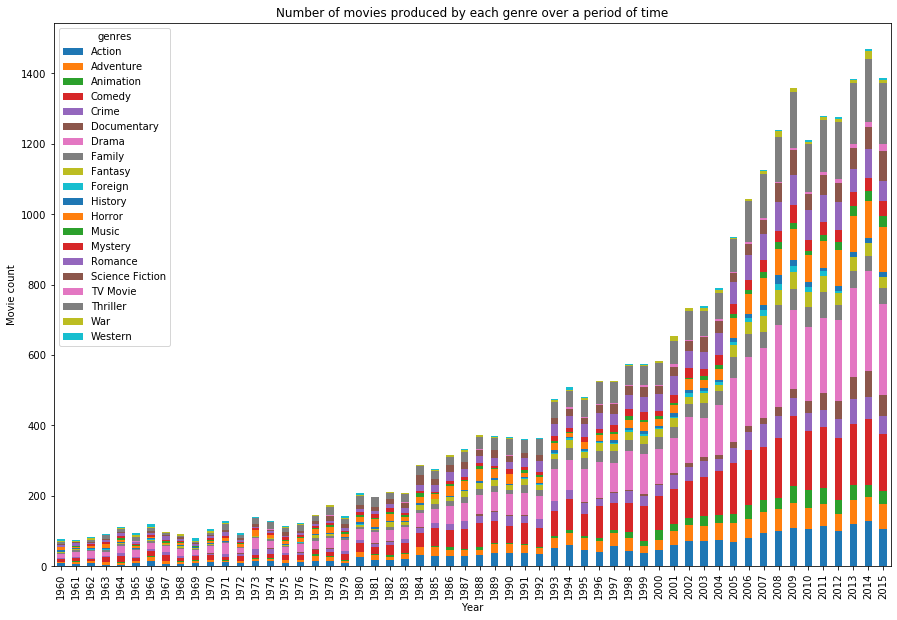

In [29]:
# number of movies produced by each genre over the period of time
genre_count = df2.groupby(['release_year','genres'])['genres'].count().unstack('genres').fillna(0)
genre_count.plot(kind='bar', stacked=True, figsize=(15, 10))

plt.title('Number of movies produced by each genre over a period of time')
plt.xlabel('Year')
plt.ylabel('Movie count')
plt.show();

2014 has highest numbers of movies produced under different genres. Please note the movie count represent total movies under each genre. A single movie can be categorized under more than one genre,  hence the movie can be counted more than once depending upon the number of genres its been categorized into.

Interesting fact!- The trend shows Drama genre grown a lot over a period of time. People do like drama these days, lol.

<a id='conclusions'></a>
## Conclusions

The dataset is rich in information and give lots of interesting insights on movies production. Overall, the film industry is profitable. Needless to say, people do enjoy movies and are willing to spend on engaging movies like adventure movies. 